# Linear regression

### Simple linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/eduardoarmenta/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')

In [7]:
df['TotalSpend'] = df['TV'] + df['radio'] + df['newspaper']
df

,TV,radio,newspaper,sales,TotalSpend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<AxesSubplot:xlabel='TotalSpend', ylabel='sales'>

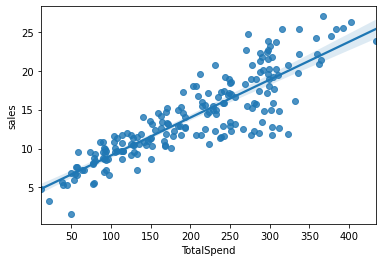

In [10]:
# for simple regression, sns has a regplot to plot a scatterplot with a best fit line
sns.regplot(data=df,x='TotalSpend',y='sales')

In [11]:
# setting up independent and dependent variables
X = df['TotalSpend']
y = df['sales']

In [14]:
# solving ordinary least squares
# result gives you slope and constant in that order
np.polyfit(X, y, 1)

array([0.04868788, 4.24302822])

In [15]:
# creating potential spend values
potential_spend = np.linspace(0,500,100)

In [16]:
# predicting the sales
predicted_sales = 0.04868788*potential_spend + 4.24302822

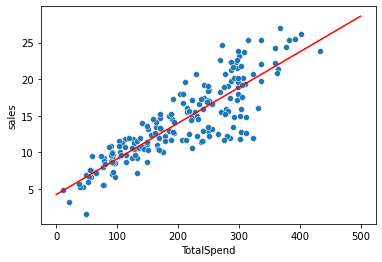

In [22]:
# plotting the regression over the scatterplot
sns.scatterplot(data=df,x='TotalSpend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red');

In [23]:
# predicting sales
spend = 200
predicted_sales = 0.04868788*spend + 4.24302822
predicted_sales

13.98060422

### Scikit-Learn

In [ ]:
# most popular library for machine learning

# train and test data selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# choosing a model
from sklearn.model_family import ModelAlgo
my_model = ModelAlgo(param1, param2)
mymodel.fit(X_train, y_train)
predictions = mymodel.predict(X_test)

# import error metrics
from sklearn.metrics import error_metric
performance = error_metric(y_test, predictions)

### Creating a regression model, all steps with error metrics and residual plot

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/Users/eduardoarmenta/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')

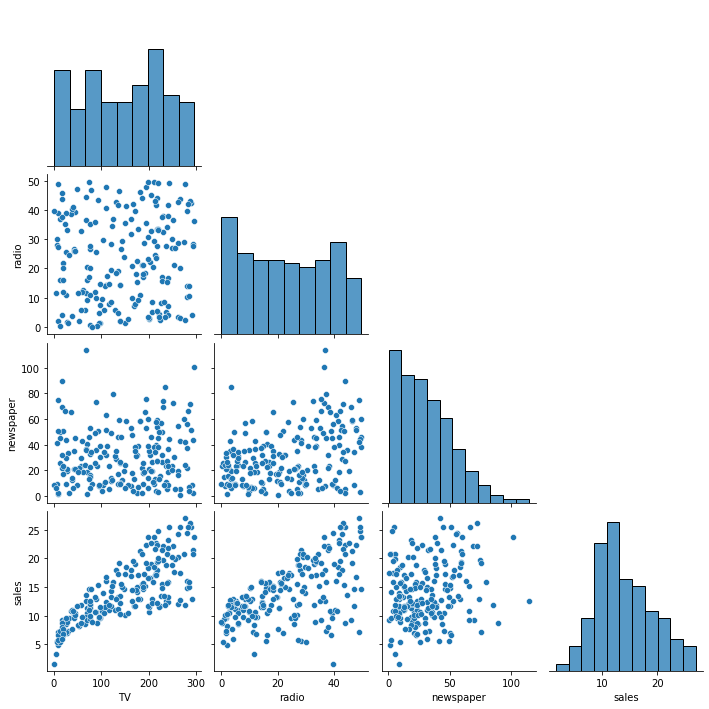

In [3]:
# look at possible correlations
sns.pairplot(df,corner=True)

In [4]:
# create X dataframe, which is the dataframe without the label variable
X = df.drop('sales', axis=1)

In [5]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
# create a dataframe of only the label variable
y = df['sales']

In [2]:
from sklearn.model_selection import train_test_split

In [8]:
# split label and non-lable data into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [3]:
from sklearn.linear_model import LinearRegression

In [10]:
# create instance of the model
model = LinearRegression()

In [11]:
# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# get predictions for the testing data
test_predictions = model.predict(X_test)

In [4]:
# import error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
# get the MAE. put in the test labels and compare to the predicted labels
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [15]:
# get the MSE
mean_squared_error(y_test, test_predictions)

2.2987166978863782

In [16]:
# root mean sqaured error
np.sqrt(mean_squared_error(y_test, test_predictions))

1.516151937599388

In [17]:
test_residuals = y_test - test_predictions

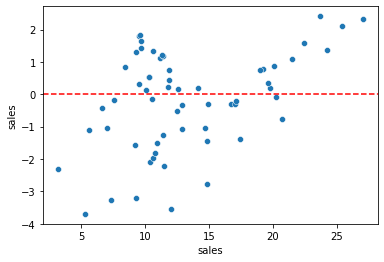

In [18]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0,color='red',linestyle='dashed')

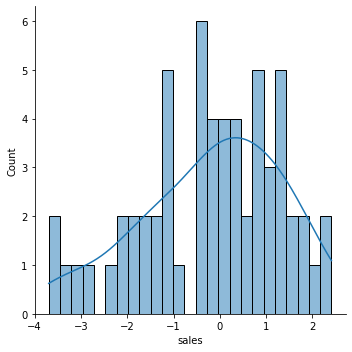

In [19]:
sns.displot(test_residuals,bins=25,kde=True)

### Performance evaluations for regression models

In [17]:
# mean absolute error gets the absolute value of every error and then takes the average across all predictions
# doesn't punish large errors

In [18]:
# mean squared error punishes large errors

In [ ]:
# root mean squared error
# punishes the large errors but reports back in original scale by getting the square root of everything

### Model deployment and coefficient interpretation

In [25]:
# you want a residual plot to gravitate around 0 to ensure the model is correct
# you also don't want to see a pattern on the plot

In [20]:
final_model = LinearRegression()

In [22]:
final_model.fit(X,y)

LinearRegression()

In [24]:
# for every unit of movement of the variable, you expect a movement of beta value coefficient
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [5]:
# deploying a model
from joblib import dump,load
dump(final_model, 'final_sales_model.joblib')

In [26]:
# loading model
loaded_model = load('final_sales_model.joblib')

In [28]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [29]:
# creating imaginary campaign for prediction. 149 tv, 22 radio, 12 newspaper
campaign = [[149,22,12]]

In [30]:
loaded_model.predict(campaign)

array([13.893032])

### Polynomial regression

In [6]:
# used when the relationship isn't linear
# creates polynomial features to have more variables to train the model with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load data
df = pd.read_csv('/Users/eduardoarmenta/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')

In [7]:
# creating dataframe with variables and dataframe with predictor
X = df.drop('sales', axis=1)
y = df['sales']

In [8]:
# import package for polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# create an instance of the function
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
# fit it to a dataset. here's the data we want to convert
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
# actually convert the data
polyfeatures = polynomial_converter.transform(X)

In [12]:
# splitting the poly features and predictors
X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size=0.3, random_state=101)

In [13]:
# import model
from sklearn.linear_model import LinearRegression

In [14]:
# create instance of model
model = LinearRegression()

In [15]:
# fit the model
model.fit(X_train,y_train)

LinearRegression()

In [16]:
# assign predictions to a variable
test_predictions = model.predict(X_test)

In [17]:
# import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [19]:
print(MAE)
print(RMSE)

0.4896798044803489
0.6646431757268974


### Elbow graphs

In [20]:
# create the different order polynomial
# split poly into train and test sets
# fit on train
# store the rmse for both the train and test sets
# plot the results (error vs polynomial degree order)

# load data
df = pd.read_csv('/Users/eduardoarmenta/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')

# creating dataframe with variables and dataframe with predictor
X = df.drop('sales', axis=1)
y = df['sales']

In [21]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

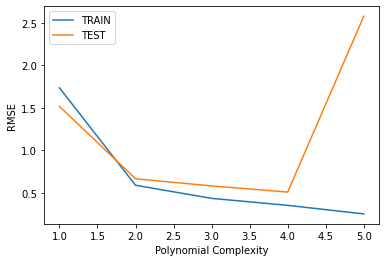

In [22]:
# error vs complexity plot for train and test RMSE
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [23]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [24]:
final_model = LinearRegression()

In [25]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [26]:
from joblib import dump,load

In [27]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [28]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

### Feature scaling

In [ ]:
# making sure the features are on the same scale.
# standardizing gives a mean of zero and standard deviation of 1
# normalization rescales all data to be between 0 and 1

### Cross validation

In [31]:
# split the data into different test, trains pairs and run your model. find error for it all and take the mean
# this way you are able tot rain the model with all the data
# this method actually creaets some data leakage. to counter this you create a hold-out dataset, which is dat that is hold until the eva;uation on that set

### Regularization data setup

In [1]:
# regularization for linear regression

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('/Users/eduardoarmenta/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')

# separate variables with predicted
X = df.drop('sales',axis=1)
y = df['sales']

In [3]:
# import function for creation of polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# create the instance
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [5]:
# create the features
poly_features = polynomial_converter.fit_transform(X)

In [6]:
# import train test split function
from sklearn.model_selection import train_test_split

In [7]:
# split the polynomial variables data
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

In [8]:
# import the scaler function
from sklearn.preprocessing import StandardScaler

In [9]:
# create an instance of the scaler
scaler = StandardScaler()

In [10]:
# fit it only to the test set
scaler.fit(X_train)

StandardScaler()

In [11]:
# scale the X_train data
X_train = scaler.transform(X_train)

In [12]:
# scale the X_test data
X_test = scaler.transform(X_test)

### Ridge regression regularization

In [15]:
# assigns a penalty to lower the slope of the regression line so it doesn't overfit to the training data
from sklearn.linear_model import Ridge

In [16]:
ridge_model = Ridge(alpha=10)

In [17]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [18]:
test_predictions = ridge_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [21]:
print(MAE)
print(RMSE)

0.5774404204714164
0.8946386461319648


In [22]:
# ridge with cross validation
from sklearn.linear_model import RidgeCV

In [32]:
# takes a tuple as the alphas
ridge_cv_model = RidgeCV(alphas=(0.1,1,10), scoring='neg_mean_absolute_error')

In [33]:
# the X_train actually becomes the train data and it's also additionally split into a holdout dataset
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [34]:
# gives you the best performing alpha
ridge_cv_model.alpha_

0.1

In [35]:
from sklearn.metrics import SCORERS

In [36]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [37]:
# re-run previous model but with better alpha
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
test_predictions = ridge_model.predict(X_test)
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
print(MAE)
print(RMSE)

0.4273774884328798
0.6180719926963167


In [38]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

### Lasso regression

In [39]:
# limits the size of the coefficients
# can yield sparse models. some coefficients can become 0

In [40]:
from sklearn.linear_model import LassoCV

In [47]:
# eps ratio of alpha min to alpha max
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [48]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1)

In [56]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [57]:
test_predictions = lasso_cv_model.predict(X_test)

In [58]:
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [59]:
print(MAE)
print(RMSE)

0.6541723161252858
1.130800102276254


### Elastic net

In [60]:
# uses Lasso and Ridge together

In [61]:
from sklearn.linear_model import ElasticNetCV

In [62]:
# the l1 ratio tells you how much of the model will be l1 vs l2
# l1 is lasso and l2 is ridge
elasticmodel = ElasticNetCV(l1_ratio=[.1, .5 ,.7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [63]:
elasticmodel.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [71]:
# gives best l1 ratio
elasticmodel.l1_ratio_

1.0

In [72]:
elasticmodel.alpha_

0.004943070909225833

In [74]:
test_predictions = elasticmodel.predict(X_test)

In [75]:
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [76]:
print(MAE)
print(RMSE)

0.43350346185900573
0.6063140748984025
